# EDA on Wine Quality Data Analysis

## Disclosing the wine quality dataset

The wine quality dataset contains information about various physicochemical properties of wines. Each wine has a quality label associated with it. The label is in the range of 0 to 10.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import probplot
from scipy.stats import pearsonr

## Loading the dataset

In [2]:
df_raw = pd.read_csv("../data/winequalityN.csv")
df_raw.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

- *Type*: Type of wine. Red or white.
- *Fixed acidity*: Amount of tartaric acid in the wine. 
- *Volatile acidity*: Amount of acetic acid in the wine.
- *Citric acid*: Amount of citric acid in the wine.
- *Residual sugar*: Amount of sugar left in the wine after fermentation.
- *Chlorides*: Amount of salts in mineral acids.
- *Free sulfur dioxide*: Amount of $SO_2$ in free form.
- *Total sulfur dioxide*: Total amount of $SO_2$ in the wine. Works as an antioxidant and antimicrobial agent.
- *Density*: Density of the wine.
- *pH*: pH value of the wine. The range of value is between 0 (high acidity) to 14 (basic acidity).
- *Sulphates*: Amount of potassium sulphate in the wine.
- *Alcohol*: Alcohol content in the wine.
- *Quality*: Quality of wine. The range of value is between 1 (worst) to 10 (best).

## Descriptive statistics

In [3]:
df_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df_raw.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Data wrangling

### Missing values

In [6]:
df_raw.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
df_raw = df_raw.interpolate()

In [8]:
df_raw.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Analyzing the data

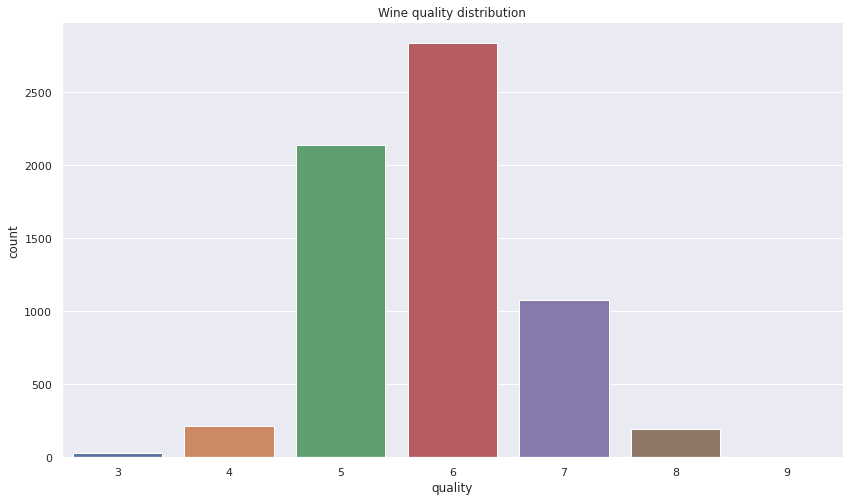

In [9]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.countplot(x='quality', data=df_raw).set(title='Wine quality distribution')
plt.show()

### Correlated columns

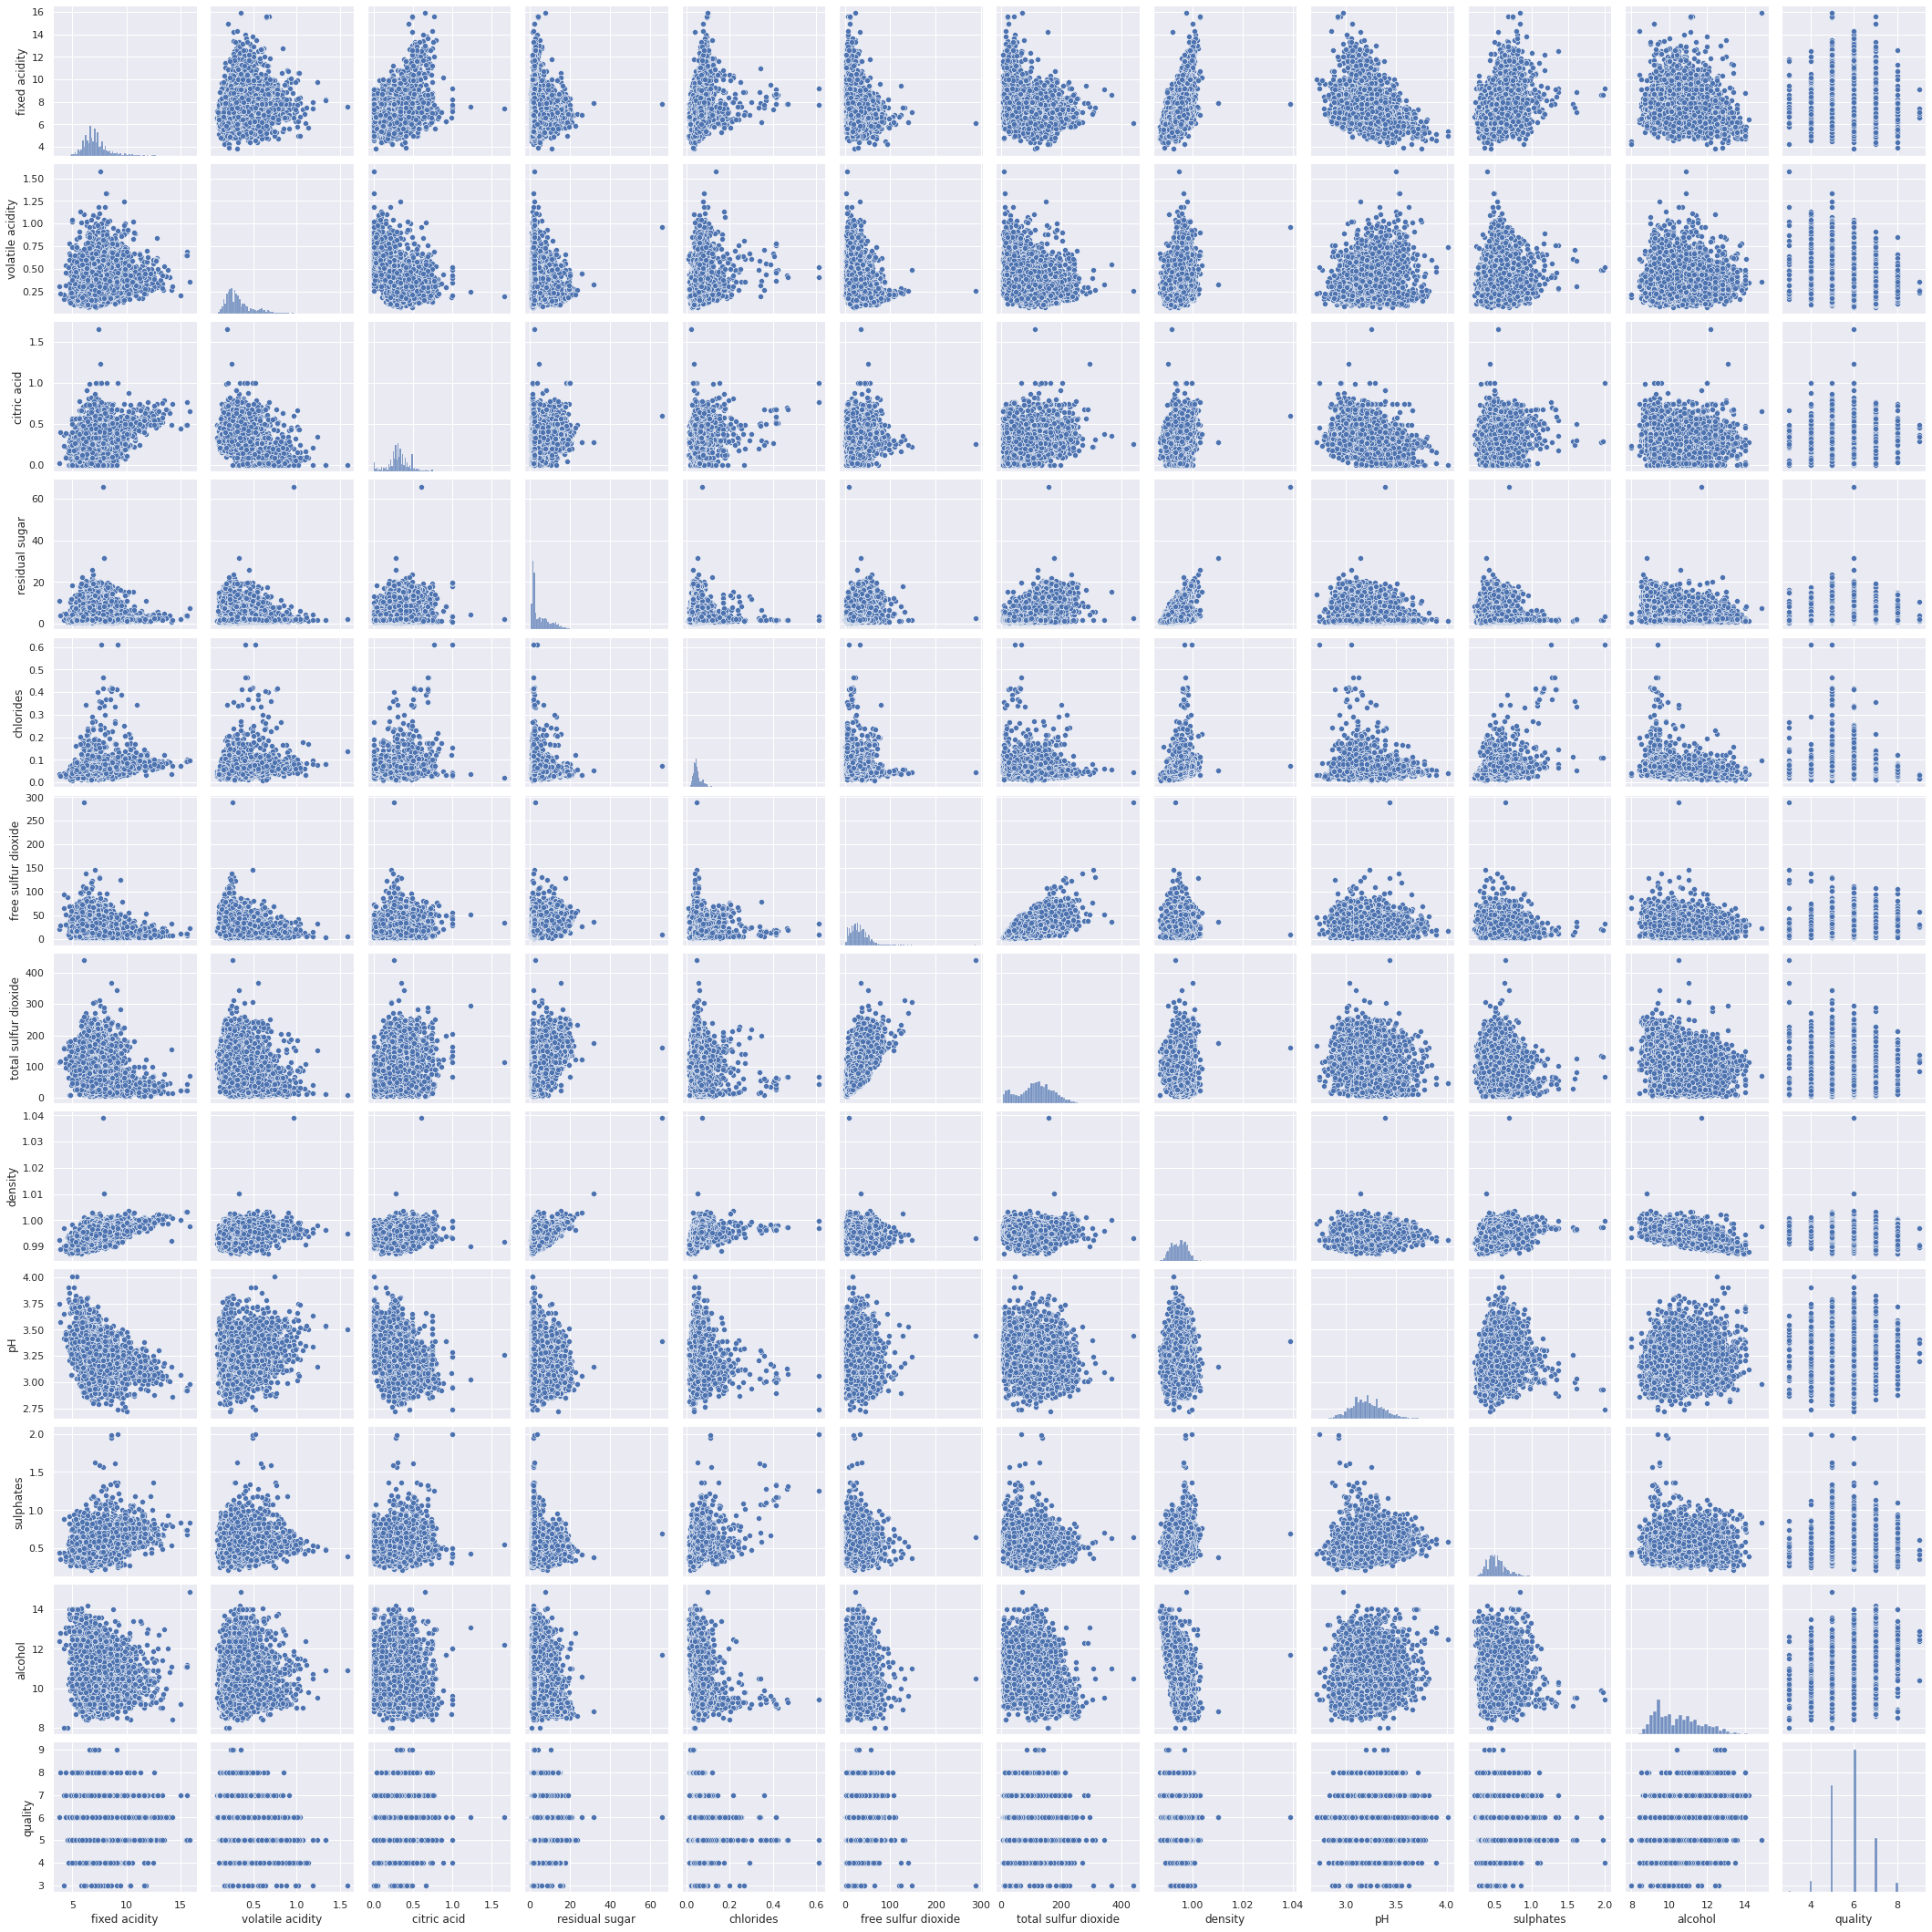

In [10]:
sns.pairplot(df_raw)
plt.show()

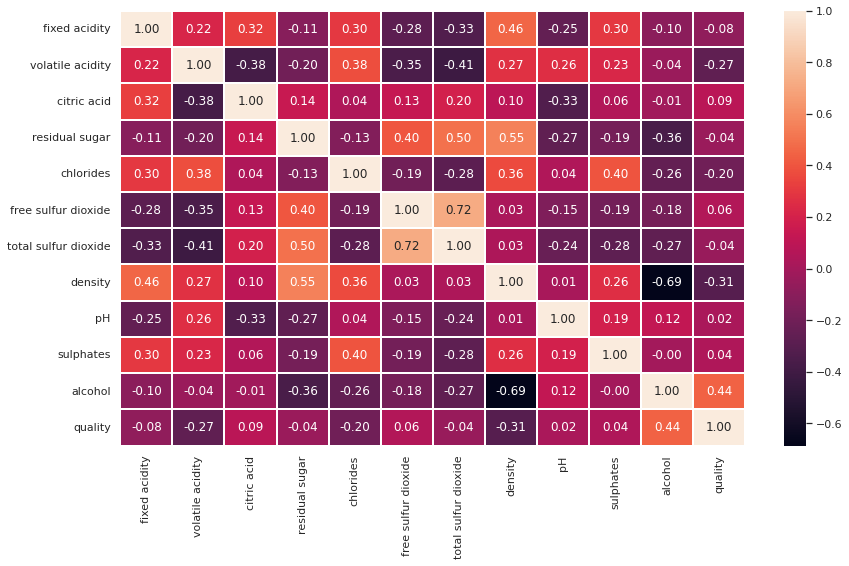

In [11]:
sns.heatmap(df_raw.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

- Alcohol is positively correlated with the quality of the red wine.
- Alcohol has a weak positive correlation with the pH value.
- Citric acid and density have a strong positive correlation with fixed acidity.
- pH has a negative correlation with density, fixed acidity, citric acid, and sulfates.


In [12]:
def plot_feature_distribution(df : pd.DataFrame(), feature : str) -> None:
    '''Plots probability and distribution analysis. 
    '''
    f, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    sns.histplot(df[feature], kde=True, stat='density', linewidth=0, ax=ax[0]).set(title=f'{feature} distribution')
    
    #Probability plot
    probplot(df[feature], plot=ax[1])
    
    plt.show()
    print(f'{feature} skewness = {skew(df[feature])}')

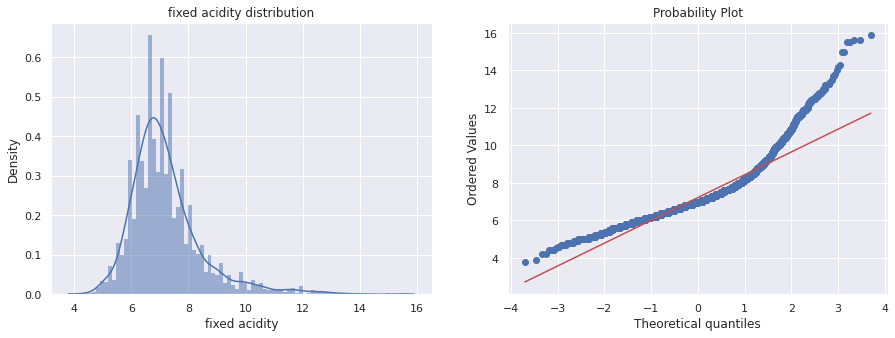

fixed acidity skewness = 1.7239327161904272


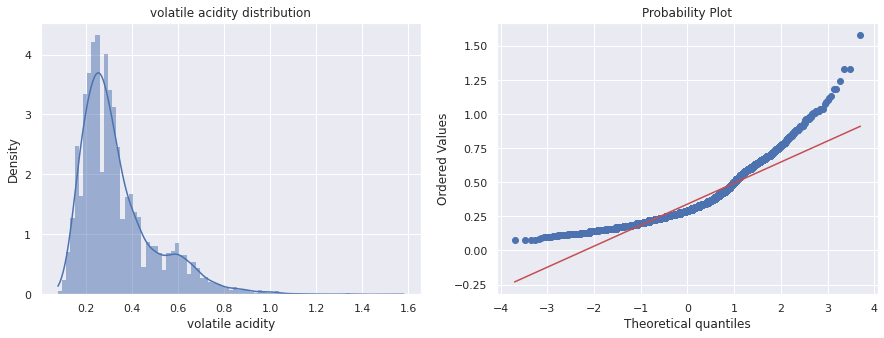

volatile acidity skewness = 1.4951682713813002


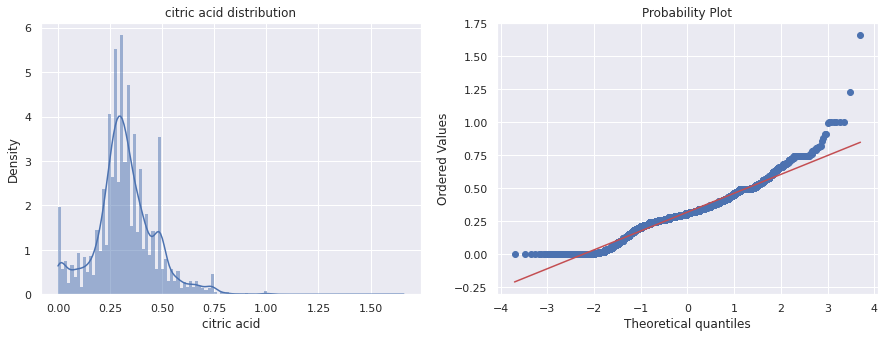

citric acid skewness = 0.4729279281366497


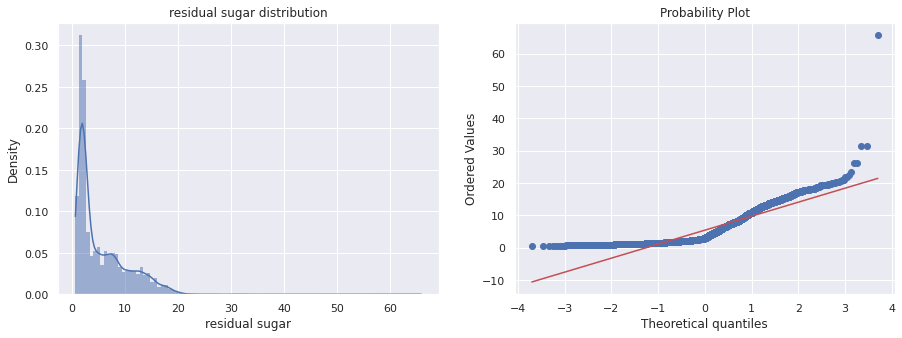

residual sugar skewness = 1.434545938769549


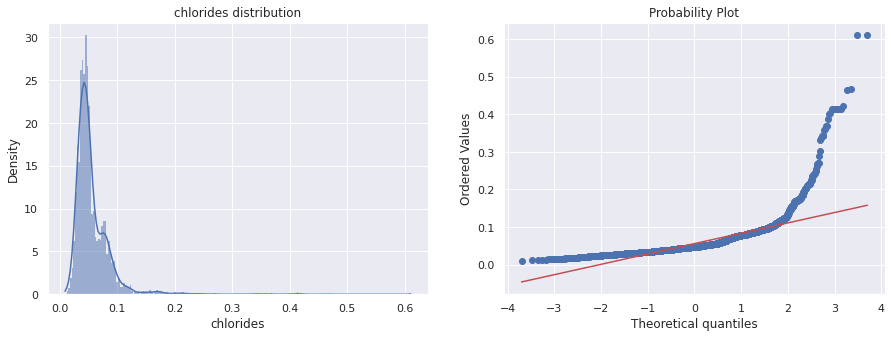

chlorides skewness = 5.399324368120014


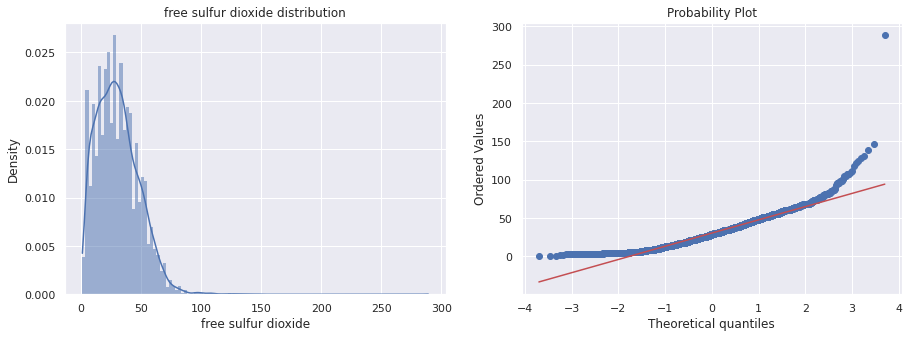

free sulfur dioxide skewness = 1.219784372282318


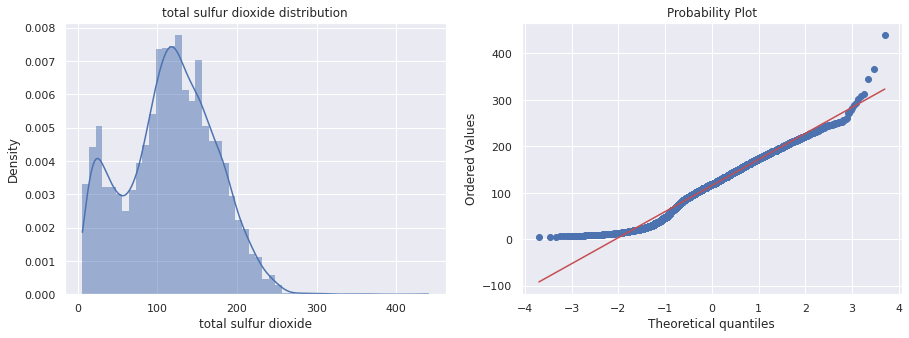

total sulfur dioxide skewness = -0.001177206365785478


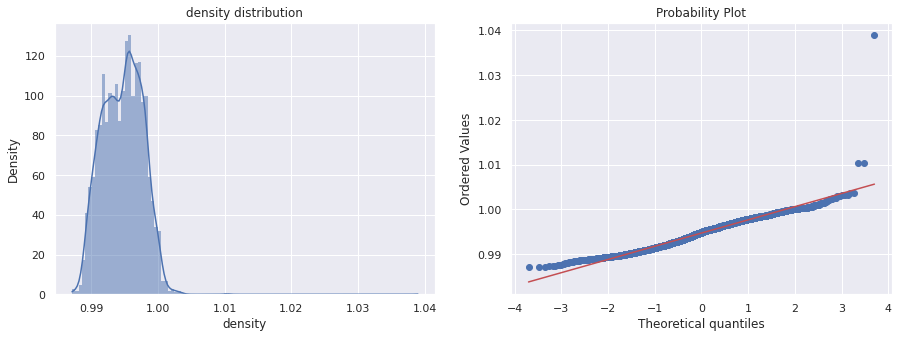

density skewness = 0.5034854532378842


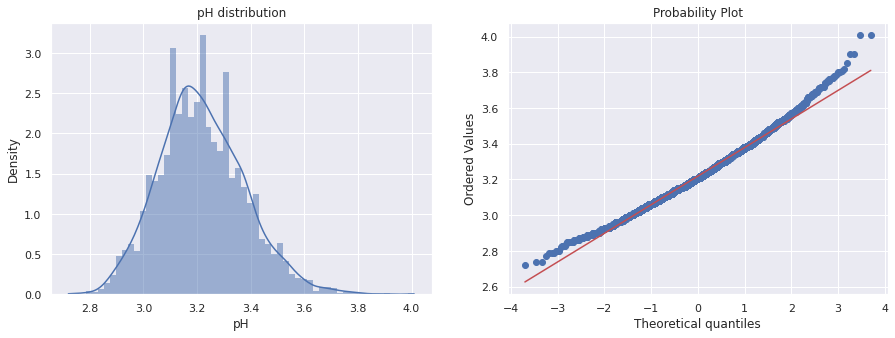

pH skewness = 0.38599455525899157


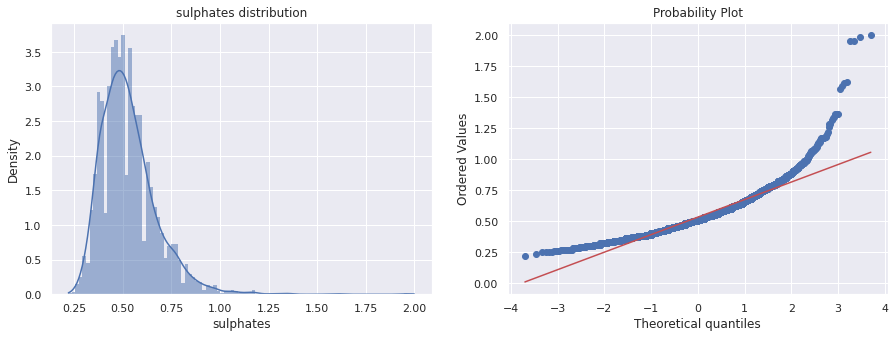

sulphates skewness = 1.7966414901563044


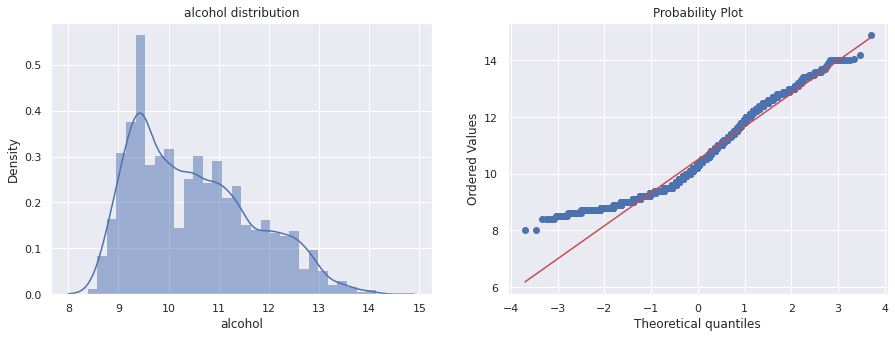

alcohol skewness = 0.5655871101918292


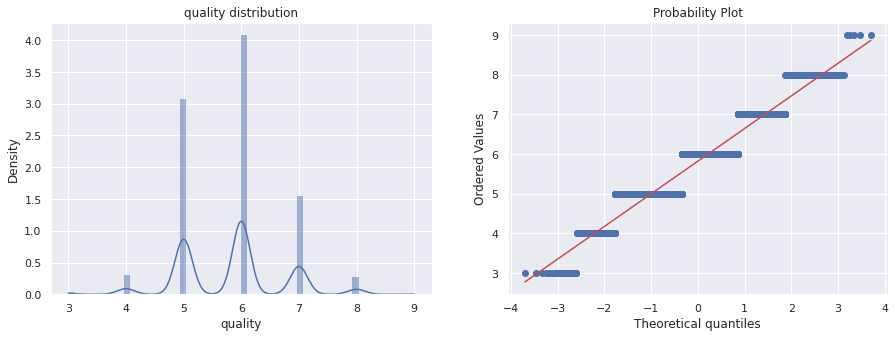

quality skewness = 0.18957891127582205


In [13]:
numeric_features = df_raw.select_dtypes(include=np.number).columns.tolist()
for feature in numeric_features:
    plot_feature_distribution(df_raw, feature)

### Bivariate analysis

In [14]:
def get_correlation(feature_1 : str, feature_2 : str, df : pd.DataFrame()) -> None:
    pearson_corr, p_value = pearsonr(df[feature_1], df[feature_2])
    print(f"Correlation between {feature_1} and {feature_2} is {pearson_corr}")
    print(f"P-value of this correlation is {p_value}")

    

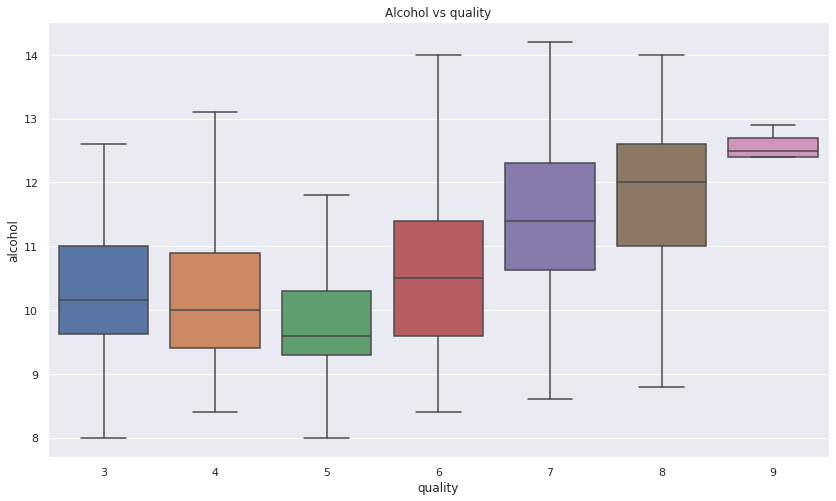

Correlation between quality and alcohol is 0.4443185200075175
P-value of this correlation is 1.49754444842e-312


In [15]:
sns.boxplot(x='quality', y = 'alcohol', data=df_raw, showfliers=False).set(title="Alcohol vs quality")
plt.show()
get_correlation('quality', 'alcohol', df_raw)

As the quality of wine increases, so does the alcohol concentration.

### Convert target feature into categorical column

Although the quality column is numerical, here, we are interested in taking quality as a class

$$
\mathrm{quality\_label} = \begin{cases}
    low & \text{if } value \leq 5 \\
    medium & \text{if } 5 < value \leq 7 \\
    high & \text{if } value > 7
\end{cases}
$$


In [16]:
def convert_quality_numerical_to_categorical(value: int) -> None:
    if value <= 5:
        return 'low'
    elif value >5 and value <= 7:
        return 'medium'
    else:
        return 'high'

In [36]:
df_wine = df_raw
df_wine['quality_label'] = df_wine['quality'].apply(convert_quality_numerical_to_categorical)
#df_wine = df_wine.drop('quality', axis=1)
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


In [37]:
print(df_wine['quality_label'].value_counts())

medium    3915
low       2384
high       198
Name: quality_label, dtype: int64


### Grouping columns

In [39]:
subset_attr = ['alcohol', 'density', 'volatile acidity', 'quality']

low = round(df_wine[df_wine['quality_label'] == 'low'][subset_attr].describe(), 2)

medium = round(df_wine[df_wine['quality_label'] == 'medium'][subset_attr].describe(), 2)

high = round(df_wine[df_wine['quality_label'] == 'high'][subset_attr].describe(), 2)

pd.concat([low, medium, high], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine','High Quality Wine'])

Low Quality Wine                                    Medium Quality Wine  \
               alcohol  density volatile acidity  quality             alcohol   
count          2384.00  2384.00          2384.00  2384.00             3915.00   
mean              9.87     1.00             0.40     4.88               10.81   
std               0.84     0.00             0.19     0.36                1.20   
min               8.00     0.99             0.10     3.00                8.40   
25%               9.30     0.99             0.26     5.00                9.80   
50%               9.60     1.00             0.34     5.00               10.80   
75%              10.40     1.00             0.50     5.00               11.70   
max              14.90     1.00             1.58     5.00               14.20   

                                         High Quality Wine          \
       density volatile acidity  quality           alcohol density   
count  3915.00          3915.00  3915.00            198.00  198.00   
mean      0.99             0.31     6.28             11.69    0.99   
std       0.00             0.14     0.45              1.27    0.00   
min       0.99             0.08     6.00              8.50    0.99   
25%       0.99             0.21     6.00             11.00    0.99   
50%       0.99             0.27     6.00             12.00    0.99   
75%       1.00             0.36     7.00             12.60    0.99   
max       1.04             1.04     7.00             14.00    1.00   

                                
      volatile acidity quality  
count           198.00  198.00  
mean              0.29    8.03  
std               0.12    0.16  
min               0.12    8.00  
25%               0.21    8.00  
50%               0.28    8.00  
75%               0.35    8.00  
max               0.85    9.00

### Univariate analysis

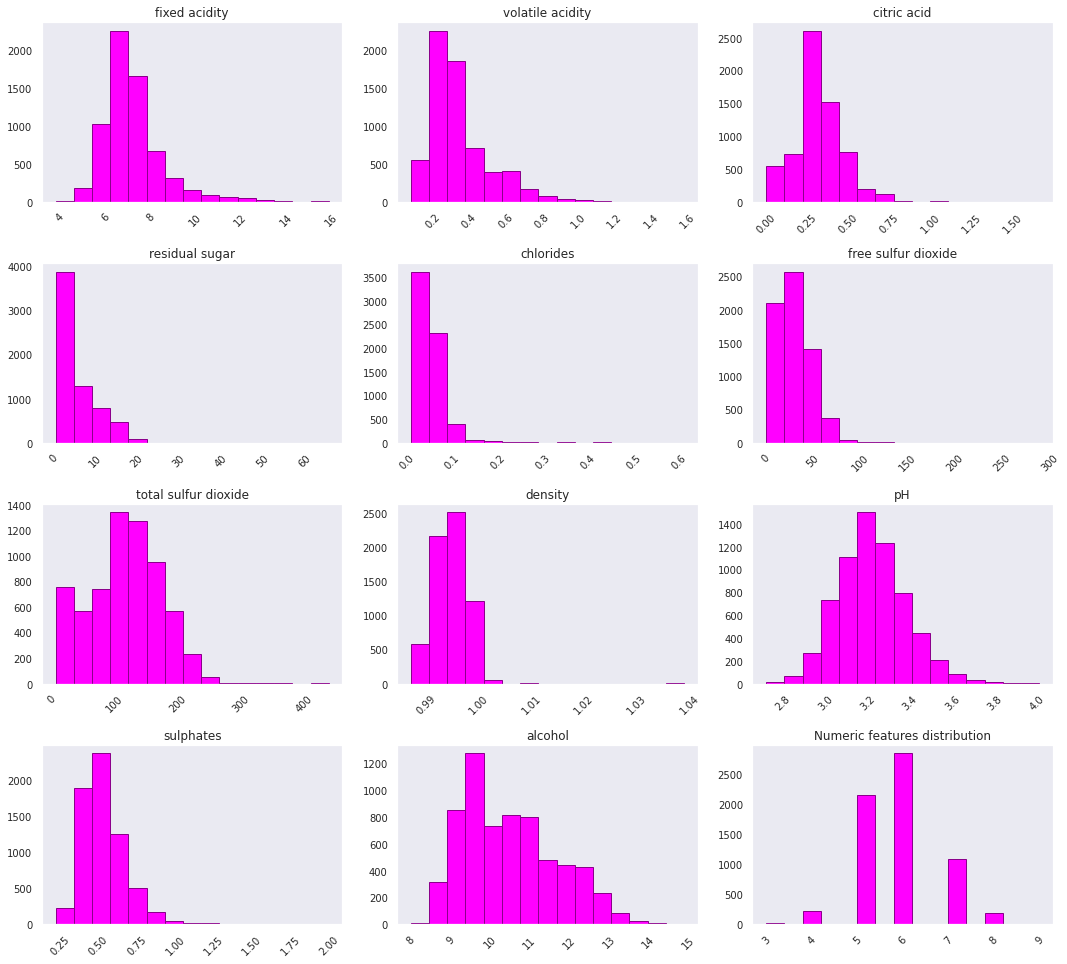

In [40]:
fig = df_wine.hist(bins=15, color='fuchsia', edgecolor='darkmagenta', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))
plt.title('Numeric features distribution')
plt.show()

### Multivariate analysis

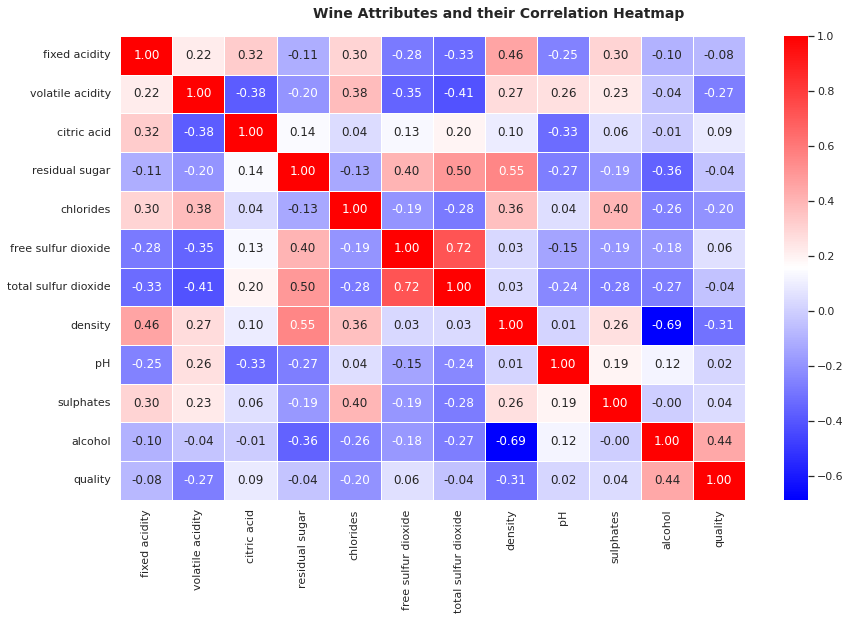

In [41]:
fig, (ax) = plt.subplots(1, 1, figsize=(14, 8))
hm = sns.heatmap(df_wine.corr(), ax=ax, cmap="bwr", annot=True, fmt='.2f', linewidths=0.5)
fig.subplots_adjust(top = 0.93)
fig.suptitle('Wine Attributes and their Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()


## Discrete categorical features

There is only one categorical column -> *type*

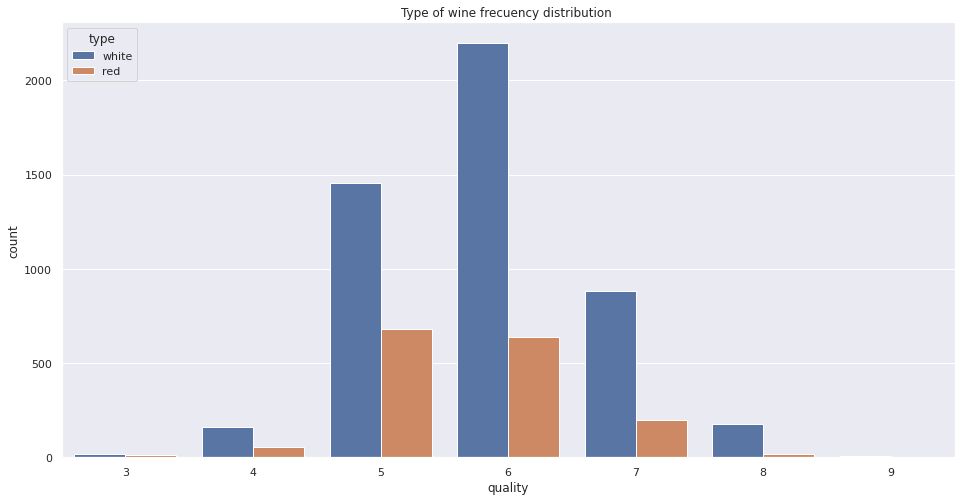

In [44]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(data=df_wine, x="quality", hue="type").set(title="Type of wine frecuency distribution ")
plt.show()

### 3D visualization

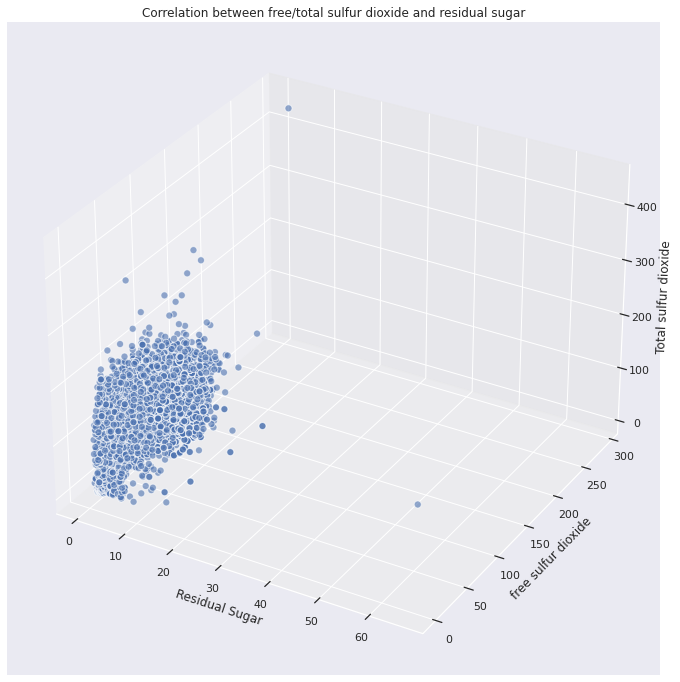

In [48]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

xscale = df_wine['residual sugar']
yscale = df_wine['free sulfur dioxide']
zscale = df_wine['total sulfur dioxide']
ax.scatter(xscale, yscale, zscale, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Residual Sugar')
ax.set_ylabel('free sulfur dioxide')
ax.set_zlabel('Total sulfur dioxide')

plt.title("Correlation between free/total sulfur dioxide and residual sugar")
plt.show()

The three variables have positive correlation with respect to one another.

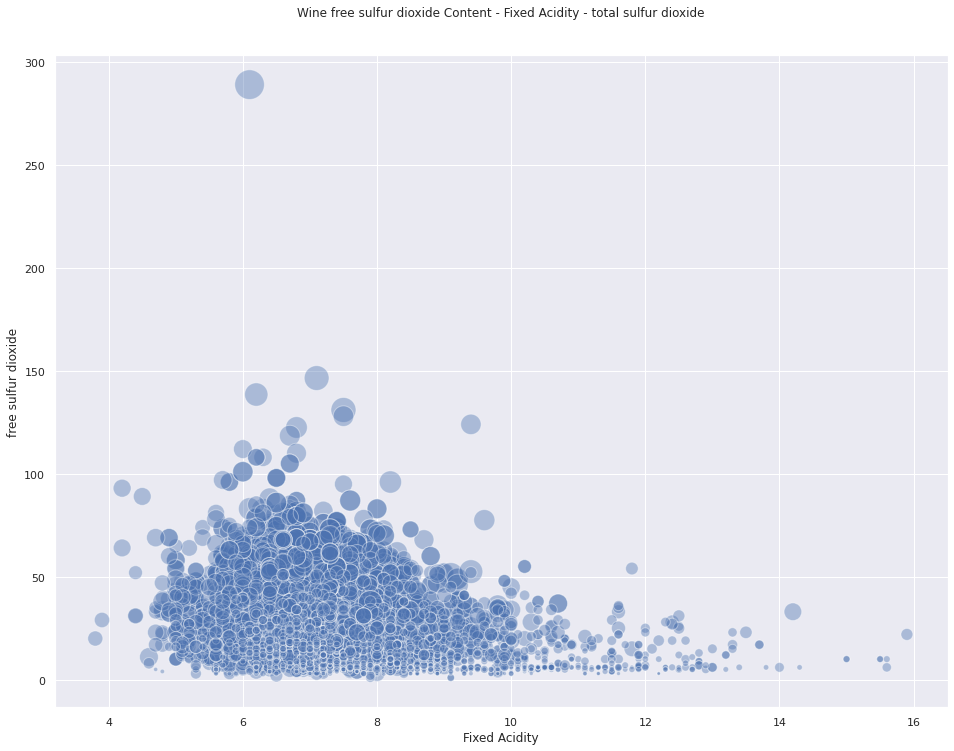

In [50]:
fig = plt.figure(figsize=(16, 12))
plt.scatter(x = df_wine['fixed acidity'],
y = df_wine['free sulfur dioxide'],
s = df_wine['total sulfur dioxide'] * 2,
alpha=0.4,
edgecolors='w')
plt.xlabel('Fixed Acidity')
plt.ylabel('free sulfur dioxide')
plt.title('Wine free sulfur dioxide Content - Fixed Acidity - total sulfur dioxide', y=1.05)
plt.show()

The larger the radius of the circle is, the higher the value of residual sugar. Most of the higher circles are located between 4 and 10 in the x axis and 25 - 150 in the y axis.